# Hyperparameter optimization

p167

In [ ]:
# これは実際には実行しない

# define the best accuracy to be 0
# if you choose loss as a metric,
# you can make best loss to be inf (np.inf)
best_accuracy = 0
best_parameters = {"a": 0, "b": 0, "c": 0}
# loop over all values for a, b & c
for a in range(1, 11):
    for b in range(1, 11):
        for c in range(1, 11):
            # inititalize model with current parameters
            model = MODEL(a, b, c)
            # fit the model
            model.fit(training_data)
            # make predictions
            preds = model.predict(validation_data)
            # calculate accuracy
            accuracy = metrics.accuracy_score(targets, preds)
            # save params if current accuracy
            # is greater than best accuracy
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_parameters["a"] = a
                best_parameters["b"] = b
                best_parameters["c"] = c

p168
##  Grid search

gini = ジニ係数：ジニ係数（ジニけいすう、英: Gini coefficient）とは主に社会における所得の不平等さを測る指標である。 ローレンツ曲線をもとに、1936年にイタリアの統計学者、コッラド・ジニによって考案された。
https://ja.wikipedia.org/wiki/%E3%82%B8%E3%83%8B%E4%BF%82%E6%95%B0#:~:text=%E3%82%B8%E3%83%8B%E4%BF%82%E6%95%B0%EF%BC%88%E3%82%B8%E3%83%8B%E3%81%91%E3%81%84%E3%81%99%E3%81%86,%E3%82%B8%E3%83%8B%E3%81%AB%E3%82%88%E3%81%A3%E3%81%A6%E8%80%83%E6%A1%88%E3%81%95%E3%82%8C%E3%81%9F%E3%80%82

https://bellcurve.jp/statistics/course/3798.html

In [1]:
# Mobile Price Classification
# https://www.kaggle.com/iabhishekofficial/mobile-price-classification

# rf_grid_search.py
import numpy as np
import pandas as pd

from sklearn import ensemble
from sklearn import metrics
from sklearn import model_selection

df = pd.read_csv("./data/mobile_train.csv")
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [2]:
df.shape

(2000, 21)

In [3]:
%%time

if __name__ == "__main__":
    # read the training data
    df = pd.read_csv("./data/mobile_train.csv")
    
    # features are all columns without price_range
    # note that there is no id column in this dataset
    # here we have training features
    X = df.drop("price_range", axis=1).values
    # and the targets
    y = df.price_range.values
    # define the model here
    # i am using random forest with n_jobs=-1
    # n_jobs=-1 => use all cores
    classifier = ensemble.RandomForestClassifier(n_jobs=-1)
    # define a grid of parameters
    # this can be a dictionary or a list of
    # dictionaries
    param_grid = {
        "n_estimators": [100, 200, 250, 300, 400, 500],
        "max_depth": [1, 2, 5, 7, 11, 15],
        "criterion": ["gini", "entropy"]
    }
    # initialize grid search
    # estimator is the model that we have defined
    # param_grid is the grid of parameters
    # we use accuracy as our metric. you can define your own
    # higher value of verbose implies a lot of details are printed
    # cv=5 means that we are using 5 fold cv (not stratified)
    model = model_selection.GridSearchCV(
        estimator=classifier,
        param_grid=param_grid,
        scoring="accuracy",
        verbose=10,
        n_jobs=1,
        cv=5
    )
    # fit the model and extract best score
    model.fit(X, y)
    print(f"Best score: {model.best_score_}")
    print("Best parameters set:")
    best_parameters = model.best_estimator_.get_params()
    for param_name in sorted(param_grid.keys()):
        print(f"\t{param_name}: {best_parameters[param_name]}")

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] criterion=gini, max_depth=1, n_estimators=100 ...................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  criterion=gini, max_depth=1, n_estimators=100, score=0.573, total=   2.0s
[CV] criterion=gini, max_depth=1, n_estimators=100 ...................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s


[CV]  criterion=gini, max_depth=1, n_estimators=100, score=0.545, total=   0.3s
[CV] criterion=gini, max_depth=1, n_estimators=100 ...................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.2s remaining:    0.0s


[CV]  criterion=gini, max_depth=1, n_estimators=100, score=0.598, total=   0.3s
[CV] criterion=gini, max_depth=1, n_estimators=100 ...................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.5s remaining:    0.0s


[CV]  criterion=gini, max_depth=1, n_estimators=100, score=0.540, total=   0.3s
[CV] criterion=gini, max_depth=1, n_estimators=100 ...................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.7s remaining:    0.0s


[CV]  criterion=gini, max_depth=1, n_estimators=100, score=0.560, total=   0.3s
[CV] criterion=gini, max_depth=1, n_estimators=200 ...................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    3.0s remaining:    0.0s


[CV]  criterion=gini, max_depth=1, n_estimators=200, score=0.610, total=   0.4s
[CV] criterion=gini, max_depth=1, n_estimators=200 ...................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    3.3s remaining:    0.0s


[CV]  criterion=gini, max_depth=1, n_estimators=200, score=0.603, total=   0.4s
[CV] criterion=gini, max_depth=1, n_estimators=200 ...................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    3.7s remaining:    0.0s


[CV]  criterion=gini, max_depth=1, n_estimators=200, score=0.570, total=   0.4s
[CV] criterion=gini, max_depth=1, n_estimators=200 ...................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    4.1s remaining:    0.0s


[CV]  criterion=gini, max_depth=1, n_estimators=200, score=0.620, total=   0.4s
[CV] criterion=gini, max_depth=1, n_estimators=200 ...................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    4.4s remaining:    0.0s


[CV]  criterion=gini, max_depth=1, n_estimators=200, score=0.588, total=   0.4s
[CV] criterion=gini, max_depth=1, n_estimators=250 ...................
[CV]  criterion=gini, max_depth=1, n_estimators=250, score=0.573, total=   0.4s
[CV] criterion=gini, max_depth=1, n_estimators=250 ...................
[CV]  criterion=gini, max_depth=1, n_estimators=250, score=0.598, total=   0.4s
[CV] criterion=gini, max_depth=1, n_estimators=250 ...................
[CV]  criterion=gini, max_depth=1, n_estimators=250, score=0.647, total=   0.4s
[CV] criterion=gini, max_depth=1, n_estimators=250 ...................
[CV]  criterion=gini, max_depth=1, n_estimators=250, score=0.623, total=   0.4s
[CV] criterion=gini, max_depth=1, n_estimators=250 ...................
[CV]  criterion=gini, max_depth=1, n_estimators=250, score=0.578, total=   0.4s
[CV] criterion=gini, max_depth=1, n_estimators=300 ...................
[CV]  criterion=gini, max_depth=1, n_estimators=300, score=0.562, total=   0.5s
[CV] criterion

[CV]  criterion=gini, max_depth=5, n_estimators=100, score=0.835, total=   0.3s
[CV] criterion=gini, max_depth=5, n_estimators=200 ...................
[CV]  criterion=gini, max_depth=5, n_estimators=200, score=0.843, total=   0.4s
[CV] criterion=gini, max_depth=5, n_estimators=200 ...................
[CV]  criterion=gini, max_depth=5, n_estimators=200, score=0.843, total=   0.4s
[CV] criterion=gini, max_depth=5, n_estimators=200 ...................
[CV]  criterion=gini, max_depth=5, n_estimators=200, score=0.870, total=   0.4s
[CV] criterion=gini, max_depth=5, n_estimators=200 ...................
[CV]  criterion=gini, max_depth=5, n_estimators=200, score=0.830, total=   0.4s
[CV] criterion=gini, max_depth=5, n_estimators=200 ...................
[CV]  criterion=gini, max_depth=5, n_estimators=200, score=0.828, total=   0.4s
[CV] criterion=gini, max_depth=5, n_estimators=250 ...................
[CV]  criterion=gini, max_depth=5, n_estimators=250, score=0.845, total=   0.4s
[CV] criterion

[CV]  criterion=gini, max_depth=7, n_estimators=500, score=0.840, total=   0.6s
[CV] criterion=gini, max_depth=11, n_estimators=100 ..................
[CV]  criterion=gini, max_depth=11, n_estimators=100, score=0.865, total=   0.3s
[CV] criterion=gini, max_depth=11, n_estimators=100 ..................
[CV]  criterion=gini, max_depth=11, n_estimators=100, score=0.868, total=   0.3s
[CV] criterion=gini, max_depth=11, n_estimators=100 ..................
[CV]  criterion=gini, max_depth=11, n_estimators=100, score=0.902, total=   0.3s
[CV] criterion=gini, max_depth=11, n_estimators=100 ..................
[CV]  criterion=gini, max_depth=11, n_estimators=100, score=0.870, total=   0.3s
[CV] criterion=gini, max_depth=11, n_estimators=100 ..................
[CV]  criterion=gini, max_depth=11, n_estimators=100, score=0.848, total=   0.3s
[CV] criterion=gini, max_depth=11, n_estimators=200 ..................
[CV]  criterion=gini, max_depth=11, n_estimators=200, score=0.880, total=   0.4s
[CV] cri

[CV]  criterion=gini, max_depth=15, n_estimators=400, score=0.880, total=   0.6s
[CV] criterion=gini, max_depth=15, n_estimators=400 ..................
[CV]  criterion=gini, max_depth=15, n_estimators=400, score=0.858, total=   0.6s
[CV] criterion=gini, max_depth=15, n_estimators=500 ..................
[CV]  criterion=gini, max_depth=15, n_estimators=500, score=0.882, total=   0.7s
[CV] criterion=gini, max_depth=15, n_estimators=500 ..................
[CV]  criterion=gini, max_depth=15, n_estimators=500, score=0.897, total=   0.7s
[CV] criterion=gini, max_depth=15, n_estimators=500 ..................
[CV]  criterion=gini, max_depth=15, n_estimators=500, score=0.897, total=   0.7s
[CV] criterion=gini, max_depth=15, n_estimators=500 ..................
[CV]  criterion=gini, max_depth=15, n_estimators=500, score=0.880, total=   0.7s
[CV] criterion=gini, max_depth=15, n_estimators=500 ..................
[CV]  criterion=gini, max_depth=15, n_estimators=500, score=0.863, total=   0.7s
[CV] cr

[CV]  criterion=entropy, max_depth=2, n_estimators=300, score=0.725, total=   0.5s
[CV] criterion=entropy, max_depth=2, n_estimators=300 ................
[CV]  criterion=entropy, max_depth=2, n_estimators=300, score=0.650, total=   0.5s
[CV] criterion=entropy, max_depth=2, n_estimators=300 ................
[CV]  criterion=entropy, max_depth=2, n_estimators=300, score=0.672, total=   0.5s
[CV] criterion=entropy, max_depth=2, n_estimators=400 ................
[CV]  criterion=entropy, max_depth=2, n_estimators=400, score=0.718, total=   0.5s
[CV] criterion=entropy, max_depth=2, n_estimators=400 ................
[CV]  criterion=entropy, max_depth=2, n_estimators=400, score=0.655, total=   0.5s
[CV] criterion=entropy, max_depth=2, n_estimators=400 ................
[CV]  criterion=entropy, max_depth=2, n_estimators=400, score=0.670, total=   0.5s
[CV] criterion=entropy, max_depth=2, n_estimators=400 ................
[CV]  criterion=entropy, max_depth=2, n_estimators=400, score=0.688, total= 

[CV]  criterion=entropy, max_depth=7, n_estimators=250, score=0.868, total=   0.4s
[CV] criterion=entropy, max_depth=7, n_estimators=250 ................
[CV]  criterion=entropy, max_depth=7, n_estimators=250, score=0.885, total=   0.5s
[CV] criterion=entropy, max_depth=7, n_estimators=250 ................
[CV]  criterion=entropy, max_depth=7, n_estimators=250, score=0.845, total=   0.4s
[CV] criterion=entropy, max_depth=7, n_estimators=250 ................
[CV]  criterion=entropy, max_depth=7, n_estimators=250, score=0.868, total=   0.4s
[CV] criterion=entropy, max_depth=7, n_estimators=300 ................
[CV]  criterion=entropy, max_depth=7, n_estimators=300, score=0.858, total=   0.5s
[CV] criterion=entropy, max_depth=7, n_estimators=300 ................
[CV]  criterion=entropy, max_depth=7, n_estimators=300, score=0.858, total=   0.5s
[CV] criterion=entropy, max_depth=7, n_estimators=300 ................
[CV]  criterion=entropy, max_depth=7, n_estimators=300, score=0.887, total= 

[CV]  criterion=entropy, max_depth=15, n_estimators=100, score=0.882, total=   0.3s
[CV] criterion=entropy, max_depth=15, n_estimators=200 ...............
[CV]  criterion=entropy, max_depth=15, n_estimators=200, score=0.885, total=   0.4s
[CV] criterion=entropy, max_depth=15, n_estimators=200 ...............
[CV]  criterion=entropy, max_depth=15, n_estimators=200, score=0.885, total=   0.4s
[CV] criterion=entropy, max_depth=15, n_estimators=200 ...............
[CV]  criterion=entropy, max_depth=15, n_estimators=200, score=0.907, total=   0.4s
[CV] criterion=entropy, max_depth=15, n_estimators=200 ...............
[CV]  criterion=entropy, max_depth=15, n_estimators=200, score=0.863, total=   0.4s
[CV] criterion=entropy, max_depth=15, n_estimators=200 ...............
[CV]  criterion=entropy, max_depth=15, n_estimators=200, score=0.873, total=   0.4s
[CV] criterion=entropy, max_depth=15, n_estimators=250 ...............
[CV]  criterion=entropy, max_depth=15, n_estimators=250, score=0.880, 

[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:  2.9min finished


Best score: 0.8885
Best parameters set:
	criterion: entropy
	max_depth: 11
	n_estimators: 400
Wall time: 2min 52s


p171
## Random search

In [4]:
%%time

if __name__ == "__main__":
    # read the training data
    df = pd.read_csv("./data/mobile_train.csv")
    
    # features are all columns without price_range
    # note that there is no id column in this dataset
    # here we have training features
    X = df.drop("price_range", axis=1).values
    # and the targets
    y = df.price_range.values
    # define the model here
    # i am using random forest with n_jobs=-1
    # n_jobs=-1 => use all cores
    classifier = ensemble.RandomForestClassifier(n_jobs=-1)
    # define a grid of parameters
    # this can be a dictionary or a list of
    # dictionaries
    param_grid = {
        "n_estimators": np.arange(100, 1500, 100),
        "max_depth": np.arange(1, 31),
        "criterion": ["gini", "entropy"]
    }
    # initialize random search
    # estimator is the model that we have defined
    # param_distributions is the grid/distribution of parameters
    # we use accuracy as our metric. you can define your own
    # higher value of verbose implies a lot of details are printed
    # cv=5 means that we are using 5 fold cv (not stratified)
    # n_iter is the number of iterations we want
    # if param_distributions has all the values as list,
    # random search will be done by sampling without replacement
    # if any of the parameters come from a distribution,
    # random search uses sampling with replacement
    model = model_selection.RandomizedSearchCV(
        estimator=classifier,
        param_distributions=param_grid,
        n_iter=20,
        scoring="accuracy",
        verbose=10,
        n_jobs=1,
        cv=5
    )
    # fit the model and extract best score
    model.fit(X, y)
    print(f"Best score: {model.best_score_}")
    print("Best parameters set:")
    best_parameters = model.best_estimator_.get_params()
    for param_name in sorted(param_grid.keys()):
        print(f"\t{param_name}: {best_parameters[param_name]}")

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] n_estimators=1000, max_depth=6, criterion=entropy ...............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=1000, max_depth=6, criterion=entropy, score=0.845, total=   1.4s
[CV] n_estimators=1000, max_depth=6, criterion=entropy ...............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


[CV]  n_estimators=1000, max_depth=6, criterion=entropy, score=0.850, total=   1.4s
[CV] n_estimators=1000, max_depth=6, criterion=entropy ...............


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.8s remaining:    0.0s


[CV]  n_estimators=1000, max_depth=6, criterion=entropy, score=0.882, total=   1.4s
[CV] n_estimators=1000, max_depth=6, criterion=entropy ...............


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    4.2s remaining:    0.0s


[CV]  n_estimators=1000, max_depth=6, criterion=entropy, score=0.853, total=   1.5s
[CV] n_estimators=1000, max_depth=6, criterion=entropy ...............


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    5.7s remaining:    0.0s


[CV]  n_estimators=1000, max_depth=6, criterion=entropy, score=0.848, total=   1.4s
[CV] n_estimators=700, max_depth=17, criterion=entropy ...............


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    7.0s remaining:    0.0s


[CV]  n_estimators=700, max_depth=17, criterion=entropy, score=0.882, total=   1.3s
[CV] n_estimators=700, max_depth=17, criterion=entropy ...............


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    8.3s remaining:    0.0s


[CV]  n_estimators=700, max_depth=17, criterion=entropy, score=0.890, total=   1.3s
[CV] n_estimators=700, max_depth=17, criterion=entropy ...............


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    9.6s remaining:    0.0s


[CV]  n_estimators=700, max_depth=17, criterion=entropy, score=0.910, total=   1.3s
[CV] n_estimators=700, max_depth=17, criterion=entropy ...............


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   10.9s remaining:    0.0s


[CV]  n_estimators=700, max_depth=17, criterion=entropy, score=0.865, total=   1.3s
[CV] n_estimators=700, max_depth=17, criterion=entropy ...............


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   12.2s remaining:    0.0s


[CV]  n_estimators=700, max_depth=17, criterion=entropy, score=0.882, total=   1.3s
[CV] n_estimators=400, max_depth=10, criterion=gini ..................
[CV]  n_estimators=400, max_depth=10, criterion=gini, score=0.880, total=   0.6s
[CV] n_estimators=400, max_depth=10, criterion=gini ..................
[CV]  n_estimators=400, max_depth=10, criterion=gini, score=0.892, total=   0.6s
[CV] n_estimators=400, max_depth=10, criterion=gini ..................
[CV]  n_estimators=400, max_depth=10, criterion=gini, score=0.882, total=   0.6s
[CV] n_estimators=400, max_depth=10, criterion=gini ..................
[CV]  n_estimators=400, max_depth=10, criterion=gini, score=0.885, total=   0.7s
[CV] n_estimators=400, max_depth=10, criterion=gini ..................
[CV]  n_estimators=400, max_depth=10, criterion=gini, score=0.858, total=   0.6s
[CV] n_estimators=600, max_depth=5, criterion=entropy ................
[CV]  n_estimators=600, max_depth=5, criterion=entropy, score=0.825, total=   1.0s
[C

[CV]  n_estimators=900, max_depth=19, criterion=entropy, score=0.873, total=   1.6s
[CV] n_estimators=900, max_depth=19, criterion=entropy ...............
[CV]  n_estimators=900, max_depth=19, criterion=entropy, score=0.875, total=   1.8s
[CV] n_estimators=800, max_depth=1, criterion=gini ...................
[CV]  n_estimators=800, max_depth=1, criterion=gini, score=0.595, total=   1.0s
[CV] n_estimators=800, max_depth=1, criterion=gini ...................
[CV]  n_estimators=800, max_depth=1, criterion=gini, score=0.578, total=   1.0s
[CV] n_estimators=800, max_depth=1, criterion=gini ...................
[CV]  n_estimators=800, max_depth=1, criterion=gini, score=0.595, total=   1.0s
[CV] n_estimators=800, max_depth=1, criterion=gini ...................
[CV]  n_estimators=800, max_depth=1, criterion=gini, score=0.615, total=   1.0s
[CV] n_estimators=800, max_depth=1, criterion=gini ...................
[CV]  n_estimators=800, max_depth=1, criterion=gini, score=0.575, total=   1.0s
[CV] n

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.9min finished


Best score: 0.8895
Best parameters set:
	criterion: entropy
	max_depth: 19
	n_estimators: 900
Wall time: 1min 58s


## ちなみにdefault値で計算すると

In [5]:
%%time

# 交差検証
from sklearn.model_selection import cross_val_score, KFold
import numpy as np

df = pd.read_csv("./data/mobile_train.csv")
X = df.drop("price_range", axis=1).values
y = df.price_range.values

model = ensemble.RandomForestClassifier(n_jobs=-1)
kfold = KFold(n_splits=5)
scores = cross_val_score(model, X, y, cv=kfold)

print('Cross-validation scores: \n{}'.format(scores))
print('Average score: {}'.format(np.mean(scores)))

Cross-validation scores: 
[0.89   0.8675 0.885  0.8575 0.8725]
Average score: 0.8745
Wall time: 1.45 s


RandomForestClassifier のデフォルト値はこちらを参照  
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

## Optuna (1)

In [6]:
import optuna
from sklearn.ensemble import RandomForestClassifier

def objective(trial):
    '''
    trial:set of hyperparameter    
    '''
    # hypyer param
    max_depth = trial.suggest_int('max_depth', 1, 31)
    n_estimators = trial.suggest_int('n_estimators', 100, 500) 
    #min_samples_leaf = trial.suggest_int('min_samples_leaf', 2, 5) # 追加
    #min_samples_split = trial.suggest_int('min_samples_split', 2, 10) # 追加
    #max_features = trial.suggest_categorical('max_features', ['sqrt', 'auto', 'log2'])
    criterion = trial.suggest_categorical('criterion', ['gini','entropy'])
    

    # model
    model = RandomForestClassifier(max_depth=max_depth,
                                   n_estimators=n_estimators,
                                   #min_samples_leaf=min_samples_leaf,
                                   #max_features=max_features,
                                   #min_samples_split=min_samples_split,
                                   criterion=criterion,
                                   n_jobs=-1,
                                   verbose=1)
    # fit
    model.fit(X, y)

    # eval
    score = -1 * model.score(X, y) 
    return score

Duplicate key in file WindowsPath('C:/Users/iiats/Anaconda3/envs/Python37-gpu/lib/site-packages/matplotlib/mpl-data/matplotlibrc'), line 250 ('font.family:  IPAexGothic')


In [8]:
%%time

study = optuna.create_study()

# https://optuna.readthedocs.io/en/stable/reference/study.html#optuna.study.Study.optimize
study.optimize(func=objective, # 実行する関数
               n_trials=100, # 試行回数
               timeout=None, # 与えられた秒数後に学習を中止します。default=None
               n_jobs=-1 # 並列実行するjob数
              )

[I 2020-12-10 20:59:30,653] A new study created in memory with name: no-name-f7d2d40c-8986-4eee-8226-0263363ac892
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed

[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 251 out of 251 | elapsed:    1.2s finished
[I 2020-12-10 20:59:38,935] Trial 9 finished with value: -1.0 and parameters: {'max_depth': 29, 'n_estimators': 251, 'criterion': 'gini'}. Best is trial 6 with value: -1.0.
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    2.1s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 104 out of 104 | elapsed:    0.4s finished
[I 2020-12-10 20:59:39,186] Trial 14 finished with value: -1.0 and parameters: {'max_depth': 29, 'n_estimators': 104, 'criterion': 'gini'}. Best is trial 6 with value: -1.0.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Don

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    3.0s finished
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 496 out of 496 | elapsed:    7.1s finished
[Parallel(n_jobs=-1)]: Done 446 out of 446 | elapsed:    6.2s finished
[I 2020-12-10 20:59:50,365] Trial 19 finished with value: -1.0 and parameters: {'max_depth': 21, 'n_estimators': 500, 'criterion': 'entropy'}. Best is trial 6 with value: -1.0.
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 450 out of 450 | elapsed:    2.7s finished
[I 2020-12-10 20:59:50,496] Trial 21 finished with value: -1.0 and parameters: {'max_depth': 20, 'n_estimators': 450, 'criterion': 'entropy'}. Best is trial 6 with value: -1.0.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 c

[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.9s
[Parallel(n_jobs=8)]: Done 404 out of 404 | elapsed:    2.3s finished
[Parallel(n_jobs=-1)]: Done 411 out of 411 | elapsed:    5.8s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[I 2020-12-10 21:00:02,138] Trial 31 finished with value: -1.0 and parameters: {'max_depth': 17, 'n_estimators': 404, 'criterion': 'entropy'}. Best is trial 6 with value: -1.0.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 397 out of 397 | elapsed:    2.3s finished
[I 2020-12-10 21:00:02,836] Trial 32 finished with value: -1.0 and parameters: {'max_depth': 25, 'n_estimators': 397, 'criterion': 'entropy'}. Best is trial 6 with value: -1.0.
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel

[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done 474 out of 474 | elapsed:    6.6s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 473 out of 473 | elapsed:    6.5s finished
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    2.3s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    5.8s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)

[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.8s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    1.7s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    2.1s finished
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[I 2020-12-10 21:00:25,079] Trial 51 finished with value: -0.9105 and parameters: {'max_depth': 5, 'n_estimators': 500, 'criterion': 'gini'}. Best is trial 6 with value: -1.0.
[Parallel(n_jobs=8)]: Done 468 out of 468 | elapsed:    1.9s finished
[I 2020-12-10 21:00:25,325] Trial 50 finished with value: -1.0 and parameters: {'max_depth': 18, 'n_estimators': 468, 'criterion': 'gini'}. Best is trial 6 with value: -1.0.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 316 out of 316 | elapsed:    3.7s finished
[Parallel(n_jobs=8)]: Done 184 ta

[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.9s
[I 2020-12-10 21:00:34,626] Trial 61 finished with value: -1.0 and parameters: {'max_depth': 16, 'n_estimators': 384, 'criterion': 'entropy'}. Best is trial 6 with value: -1.0.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 383 out of 383 | elapsed:    2.1s finished
[Parallel(n_jobs=8)]: Done 383 out of 383 | elapsed:    2.1s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.3s
[I 2020-12-10 21:00:35,364] Trial 63 finished with value: -1.0 and parameters: {'max_depth': 16, 'n_estimators': 383, 'criterion': 'entropy'}. Best is trial 6 with value: -1.0.
[I 2020-12-10 21:00:35,384] Trial 62 finished with value: -1.0 and parameters: {'max_depth': 16, 'n_estimators': 383, 'criterion': 'entropy'}. Best is trial 6 with value: -1.0.
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.9s
[Pa

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    2.6s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 292 out of 292 | elapsed:    3.9s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.9s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 280 out of 280 | elapsed:    3.5s finished
[Parallel(n_jobs=8)]: Done 274 out of 274 | elapsed:    1.3s finished
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.6s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    1.1s
[Parallel(n_jobs=8)]: Done 433 out of 433 | elapsed:    2.6s finished
[I 2020-12-10 21:00:55,835] Trial 84 finished with value: -1.0 and parameters: {'max_depth': 28, 'n_estimators': 433, 'criterion': 'gini'}. Best is trial 6 with value: -1.0.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 426 out of 426 | elapsed:    5.5s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    2.6s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    1.1s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_

[I 2020-12-10 21:01:03,947] Trial 95 finished with value: -1.0 and parameters: {'max_depth': 16, 'n_estimators': 376, 'criterion': 'entropy'}. Best is trial 6 with value: -1.0.
[Parallel(n_jobs=-1)]: Done 371 out of 371 | elapsed:    3.4s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 394 out of 394 | elapsed:    2.4s finished
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 371 out of 371 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[I 2020-12-10 21:01:04,449] Trial 98 finished with value: -1.0 and parameters: {'max_depth': 30, 'n_estimators': 371, 'criterion': 'entropy'}. Best is trial 6 with value: -1.0.
[Parallel(n_jobs=8)]: Done 394

Wall time: 1min 33s


In [9]:
study.best_params

{'max_depth': 11, 'n_estimators': 145, 'criterion': 'entropy'}

In [10]:
# 評価
model = RandomForestClassifier( max_depth=21, n_estimators=231,criterion='gini')
model

RandomForestClassifier(max_depth=21, n_estimators=231)

In [11]:
%%time
kfold = KFold(n_splits=5)
scores = cross_val_score(model, X, y, cv=kfold)

print('Cross-validation scores: \n{}'.format(scores))
print('Average score: {}'.format(np.mean(scores)))

Cross-validation scores: 
[0.885  0.8775 0.8975 0.8875 0.875 ]
Average score: 0.8845000000000001
Wall time: 3.22 s


### Sumary 1
Deffault (cv=5)：0.8745 (1.38s)  
Grid search:   0.8885 (2min 50s)  
Random search: 0.8895 (1min 53s)  
Optuna:        0.8845 (1min 24s)  

## Optuna (2)

In [12]:
import optuna
from sklearn.ensemble import RandomForestClassifier

def objective(trial):
    '''
    trial:set of hyperparameter    
    '''
    # hypyer param
    max_depth = trial.suggest_int('max_depth', 1, 31)
    n_estimators = trial.suggest_int('n_estimators', 100, 500) 
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 2, 5) # 追加
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10) # 追加
    max_features = trial.suggest_categorical('max_features', ['sqrt', 'auto', 'log2'])
    criterion = trial.suggest_categorical('criterion', ['gini','entropy'])
    

    # model
    model = RandomForestClassifier(max_depth=max_depth,
                                   n_estimators=n_estimators,
                                   min_samples_leaf=min_samples_leaf,
                                   max_features=max_features,
                                   min_samples_split=min_samples_split,
                                   criterion=criterion,
                                   n_jobs=-1,
                                   verbose=1)
    # fit
    model.fit(X, y)

    # eval
    score = -1 * model.score(X, y) 
    return score

In [13]:
%%time

study = optuna.create_study()

# https://optuna.readthedocs.io/en/stable/reference/study.html#optuna.study.Study.optimize
study.optimize(func=objective, # 実行する関数
               n_trials=100, # 試行回数
               timeout=None, # 与えられた秒数後に学習を中止します。default=None
               n_jobs=-1 # 並列実行するjob数
              )

[I 2020-12-10 21:01:07,897] A new study created in memory with name: no-name-060fbe32-2c23-495f-a55d-aa46d14a5621
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    2.2s
[Parallel(n_jobs=8)]: Done 416 out of 416 | elapsed:    2.3s finished
[I 2020-12-10 21:01:15,180] Trial 7 finished with value: -0.977 and parameters: {'max_depth': 8, 'n_estimators': 416, 'min_samples_leaf': 4, 'min_samples_split': 7, 'max_features': 'sqrt', 'criterion': 'gini'}. Best is trial 3 with value: -0.9985.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 139 out of 139 | elapsed:    1.7s finished
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    2.3s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 365 out of 365 | elapsed:    2.9s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    2.7s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.8s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    2.3s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    1.4s
[Parallel(n_jobs=8)]: Done 342

[Parallel(n_jobs=8)]: Done 497 out of 497 | elapsed:    2.6s finished
[I 2020-12-10 21:01:31,923] Trial 27 finished with value: -0.94 and parameters: {'max_depth': 6, 'n_estimators': 497, 'min_samples_leaf': 3, 'min_samples_split': 2, 'max_features': 'log2', 'criterion': 'gini'}. Best is trial 10 with value: -1.0.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    5.2s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 479 out of 479 | elapsed:    5.8s finished
[Parallel(n_jobs=-1)]: Done 463 out of 463 | elapsed:    5.5s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent w

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    5.4s
[Parallel(n_jobs=8)]: Done 451 out of 451 | elapsed:    2.1s finished
[I 2020-12-10 21:01:41,753] Trial 37 finished with value: -1.0 and parameters: {'max_depth': 14, 'n_estimators': 451, 'min_samples_leaf': 2, 'min_samples_split': 4, 'max_features': 'log2', 'criterion': 'entropy'}. Best is trial 10 with value: -1.0.
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 444 out of 444 | elapsed:    5.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent worker

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    5.4s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    3.6s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    1.0s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 306 out of 306 | elapsed:    3.3s finished
[Parallel(n_jobs=-1)]: Done 496 out of 496 | elapsed:    6.0s finished
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.8s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Using backend 

[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    1.6s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 285 out of 285 | elapsed:    1.2s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[I 2020-12-10 21:01:57,874] Trial 58 finished with value: -0.997 and parameters: {'max_depth': 17, 'n_estimators': 285, 'min_samples_leaf': 4, 'min_samples_split': 7, 'max_features': 'sqrt', 'criterion': 'entropy'}. Best is trial 10 with value: -1.0.
[Parallel(n_jobs=8)]: Done 485 out of 485 | elapsed:    2.0s finished
[I 2020-12-10 21:01:57,931] Trial 54 finished with value: -0.9945 and parameters: {'max_depth': 17, 'n_estimators': 485, 'min_samples_leaf': 4, 'min_samples_split': 7, 'max_features': 'log2', 'criterion': 'gini'}. Best is trial 10 with value: -1.0.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 287 out

[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.6s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 401 out of 401 | elapsed:    2.6s finished
[I 2020-12-10 21:02:06,688] Trial 68 finished with value: -0.9995 and parameters: {'max_depth': 31, 'n_estimators': 401, 'min_samples_leaf': 3, 'min_samples_split': 6, 'max_features': 'auto', 'criterion': 'entropy'}. Best is trial 10 with value: -1.0.
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    2.4s
[Parallel(n_jobs=8)]: Done 407 out of 407 

[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    2.2s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    2.1s
[Parallel(n_jobs=8)]: Done 459 out of 459 | elapsed:    2.3s finished
[I 2020-12-10 21:02:16,793] Trial 77 finished with value: -1.0 and parameters: {'max_depth': 22, 'n_estimators': 459, 'min_samples_leaf': 2, 'min_samples_split': 5, 'max_features': 'log2', 'criterion': 'entropy'}. Best is trial 10 with value: -1.0.
[Parallel(n_jobs=8)]: Done 458 out of 458 | elapsed:    2.2s finished
[I 2020-12-10 21:02:16,914] Trial 78 finished with value: -1.0 and parameters: {'max_depth': 23, 'n_estimators': 458, 'min_samples_leaf': 2, 'min_samples_split': 5, 'max_features': 'log2', 'criterion': 'entropy'}. Best is trial 10 with value: -1.0.
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 240 out

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 199 out of 199 | elapsed:    2.8s finished
[Parallel(n_jobs=-1)]: Done 445 out of 445 | elapsed:    5.6s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    4.9s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    2.2s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 482 out of 482 | elapsed:    5.5s

[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 334 out of 334 | elapsed:    0.0s finished
[I 2020-12-10 21:02:29,830] Trial 97 finished with value: -1.0 and parameters: {'max_depth': 30, 'n_estimators': 334, 'min_samples_leaf': 3, 'min_samples_split': 4, 'max_features': 'log2', 'criterion': 'entropy'}. Best is trial 10 with value: -1.0.


Wall time: 1min 21s


In [14]:
study.best_params

{'max_depth': 16,
 'n_estimators': 262,
 'min_samples_leaf': 3,
 'min_samples_split': 5,
 'max_features': 'auto',
 'criterion': 'gini'}

In [15]:
# 評価
model = RandomForestClassifier( max_depth=21, n_estimators=391, min_samples_leaf=3, 
                               min_samples_split=5, max_features='auto',criterion='gini')
model

RandomForestClassifier(max_depth=21, min_samples_leaf=3, min_samples_split=5,
                       n_estimators=391)

In [16]:
%%time
kfold = KFold(n_splits=5)
scores = cross_val_score(model, X, y, cv=kfold)

print('Cross-validation scores: \n{}'.format(scores))
print('Average score: {}'.format(np.mean(scores)))

Cross-validation scores: 
[0.8825 0.885  0.895  0.87   0.8675]
Average score: 0.8800000000000001
Wall time: 5.16 s


### Summary 2
Deffault (cv=5)：0.8745 (1.38s)  
Grid search:   0.8885 (2min 50s)  
Random search: 0.8895 (1min 53s)  
Optuna:        0.8845 (1min 24s)  
Optuna(2): 0.880 (1min 12s)  

p173

## Pipline

SVD (singular value decomposition)は次元削減(Dimensionality Reduction)分野で用いられる技術である。  
https://stackoverrun.com/ja/q/3647747  
https://qiita.com/harmegiddo/items/ab542b162e5342ee433b#:~:text=SVD%20(singular%20value%20decomposition)%E3%81%AF,%E7%94%A8%E3%81%84%E3%82%89%E3%82%8C%E3%82%8B%E6%8A%80%E8%A1%93%E3%81%A7%E3%81%82%E3%82%8B%E3%80%82

In [ ]:
# これは実行しない

# pipeline_search.py
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn import model_selection
from sklearn import pipeline
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

def quadratic_weighted_kappa(y_true, y_pred):
    """
    Create a wrapper for cohen's kappa
    with quadratic weights
    """
    return metrics.cohen_kappa_score(
    y_true,
    y_pred,
    weights="quadratic"
    )

if __name__ == '__main__':
    
    # Load the training file
    train = pd.read_csv('./data/train.csv')
    
    # we dont need ID columns
    idx = test.id.values.astype(int)
    train = train.drop('id', axis=1)
    test = test.drop('id', axis=1)
    
    # create labels. drop useless columns
    y = train.relevance.values
    
    # do some lambda magic on text columns
    traindata = list(
    train.apply(lambda x:'%s %s' % (x['text1'], x['text2']),axis=1)
    )
    testdata = list(
    test.apply(lambda x:'%s %s' % (x['text1'], x['text2']),axis=1)
    )
    
    # tfidf vectorizer
    tfv = TfidfVectorizer(
        min_df=3,
        max_features=None,
        strip_accents='unicode',
        analyzer='word',
        token_pattern=r'\w{1,}',
        ngram_range=(1, 3),
        use_idf=1,
        smooth_idf=1,
        sublinear_tf=1,
        stop_words='english'
    )
    
    # Fit TFIDF
    tfv.fit(traindata)
    X = tfv.transform(traindata)
    X_test = tfv.transform(testdata)
    
    # Initialize SVD
    svd = TruncatedSVD()
    
    # Initialize the standard scaler
    scl = StandardScaler()
    
    # We will use SVM here..
    svm_model = SVC()
    
    # Create the pipeline
    clf = pipeline.Pipeline(
        [
            ('svd', svd),
            ('scl', scl),
            ('svm', svm_model)
        ]
    )
    
    # Create a parameter grid to search for
    # best parameters for everything in the pipeline
    param_grid = {
        'svd__n_components' : [200, 300],
        'svm__C': [10, 12]
    }
    
    # Kappa Scorer
    kappa_scorer = metrics.make_scorer(
    quadratic_weighted_kappa,
    greater_is_better=True
    )
    
    # Initialize Grid Search Model
    model = model_selection.GridSearchCV(
        estimator=clf,
        param_grid=param_grid,
        scoring=kappa_scorer,
        verbose=10,
        n_jobs=-1,
        refit=True,
    cv=5
    )
    
    # Fit Grid Search Model
    model.fit(X, y)
    print("Best score: %0.3f" % model.best_score_)
    print("Best parameters set:")
    best_parameters = model.best_estimator_.get_params()
    for param_name in sorted(param_grid.keys()):
        print("\t%s: %r" % (param_name, best_parameters[param_name]))
    
    # Get best model
    best_model = model.best_estimator_
    
    # Fit model with best parameters optimized for QWK
    best_model.fit(X, y)
    preds = best_model.predict(...)

p176

## Minimization of functions

Aonwnhill simplex algorithm  
http://fjt.webmasters.gr.jp/linux/yesterday/2009.09.19.html

Nelder–Mead method  
https://ja.wikipedia.org/wiki/%E3%83%8D%E3%83%AB%E3%83%80%E3%83%BC%E2%80%93%E3%83%9F%E3%83%BC%E3%83%89%E6%B3%95

Bayesian optimization with gaussian process  
https://towardsdatascience.com/the-intuitions-behind-bayesian-optimization-with-gaussian-processes-7e00fcc898a0  
https://www.slideshare.net/hoxo_m/ss-77421091

In [17]:
# rf_gp_minimize.py
import numpy as np
import pandas as pd

from functools import partial

from sklearn import ensemble
from sklearn import metrics
from sklearn import model_selection

from skopt import gp_minimize # conda install -c conda-forge scikit-optimize
from skopt import space

In [18]:
%%time

def optimize(params, param_names, x, y):
    """
    The main optimization function.
    This function takes all the arguments from the search space
    and training features and targets. It then initializes
    the models by setting the chosen parameters and runs
    cross-validation and returns a negative accuracy score
    :param params: list of params from gp_minimize
    :param param_names: list of param names. order is important!
    :param x: training data
    :param y: labels/targets
    :return: negative accuracy after 5 folds
    """
    # convert params to dictionary
    params = dict(zip(param_names, params))
    
    # initialize model with current parameters
    model = ensemble.RandomForestClassifier(**params)
    
    # initialize stratified k-fold
    kf = model_selection.StratifiedKFold(n_splits=5)
    
    # initialize accuracy list
    accuracies = []
    
    # loop over all folds
    for idx in kf.split(X=x, y=y):
        train_idx, test_idx = idx[0], idx[1]
        xtrain = x[train_idx]
        ytrain = y[train_idx]
        xtest = x[test_idx]
        ytest = y[test_idx]
        # fit model for current fold
        model.fit(xtrain, ytrain)
        #create predictions
        preds = model.predict(xtest)
        # calculate and append accuracy
        fold_accuracy = metrics.accuracy_score(
        ytest,
        preds
        )
        accuracies.append(fold_accuracy)
        
    # return negative accuracy
    return -1 * np.mean(accuracies)

if __name__ == "__main__":
    
    # read the training data
    df = pd.read_csv("./data/mobile_train.csv")
    
    # features are all columns without price_range
    # note that there is no id column in this dataset
    # here we have training features
    X = df.drop("price_range", axis=1).values
    # and the targets
    y = df.price_range.values
    
    # define a parameter space
    param_space = [
        # max_depth is an integer between 3 and 10
        space.Integer(3, 15, name="max_depth"),
        # n_estimators is an integer between 50 and 1500
        space.Integer(100, 1500, name="n_estimators"),
        # criterion is a category. here we define list of categories
        space.Categorical(["gini", "entropy"], name="criterion"),
        # you can also have Real numbered space and define a
        # distribution you want to pick it from
        space.Real(0.01, 1, prior="uniform", name="max_features")
    ]
    
    # make a list of param names
    # this has to be same order as the search space
    # inside the main function
    param_names = [
        "max_depth",
        "n_estimators",
        "criterion",
        "max_features"
    ]
    
    # by using functools partial, i am creating a
    # new function which has same parameters as the
    # optimize function except for the fact that
    # only one param, i.e. the "params" parameter is
    # required. this is how gp_minimize expects the
    # optimization function to be. you can get rid of this
    # by reading data inside the optimize function or by
    # defining the optimize function here.
    optimization_function = partial(
        optimize,
        param_names=param_names,
        x=X,
        y=y
    )
    
    # now we call gp_minimize from scikit-optimize
    # gp_minimize uses bayesian optimization for
    # minimization of the optimization function.
    # we need a space of parameters, the function itself,
    # the number of calls/iterations we want to have
    result = gp_minimize(
        optimization_function,
        dimensions=param_space,
        n_calls=15,
        n_random_starts=10,
        verbose=10
    )
    
    # create best params dict and print it
    best_params = dict(
        zip(
            param_names,
            result.x
        )
    )
    print(best_params)

Iteration No: 1 started. Evaluating function at random point.
Iteration No: 1 ended. Evaluation done at random point.
Time taken: 39.3400
Function value obtained: -0.8965
Current minimum: -0.8965
Iteration No: 2 started. Evaluating function at random point.
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 21.0040
Function value obtained: -0.9075
Current minimum: -0.9075
Iteration No: 3 started. Evaluating function at random point.
Iteration No: 3 ended. Evaluation done at random point.
Time taken: 3.2550
Function value obtained: -0.8985
Current minimum: -0.9075
Iteration No: 4 started. Evaluating function at random point.
Iteration No: 4 ended. Evaluation done at random point.
Time taken: 10.3160
Function value obtained: -0.7950
Current minimum: -0.9075
Iteration No: 5 started. Evaluating function at random point.
Iteration No: 5 ended. Evaluation done at random point.
Time taken: 13.8420
Function value obtained: -0.7740
Current minimum: -0.9075
Iteration No: 6 start

<AxesSubplot:title={'center':'Convergence plot'}, xlabel='Number of calls $n$', ylabel='$\\min f(x)$ after $n$ calls'>

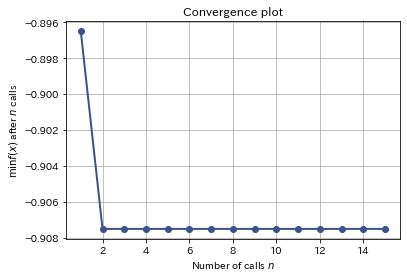

In [19]:
from skopt.plots import plot_convergence

plot_convergence(result)

In [26]:
# 最適パラメーター
# {'max_depth': 12, 'n_estimators': 803, 'criterion': 'entropy', 'max_features': 0.5484904189577905}

model = RandomForestClassifier( max_depth=12, n_estimators=803,
                               max_features=0.5484904189577905, criterion='entropy')
model

RandomForestClassifier(criterion='entropy', max_depth=12,
                       max_features=0.5484904189577905, n_estimators=803)

In [27]:
%%time
kfold = KFold(n_splits=5)
scores = cross_val_score(model, X, y, cv=kfold)

print('Cross-validation scores: \n{}'.format(scores))
print('Average score: {}'.format(np.mean(scores)))

Cross-validation scores: 
[0.905 0.915 0.91  0.895 0.9  ]
Average score: 0.905
Wall time: 21.5 s


In [28]:
%%time
# initialize stratified k-fold
kf = model_selection.StratifiedKFold(n_splits=5)
scores = cross_val_score(model, X, y, cv=kf)

print('Cross-validation scores: \n{}'.format(scores))
print('Average score: {}'.format(np.mean(scores)))

Cross-validation scores: 
[0.91   0.9275 0.9075 0.895  0.8925]
Average score: 0.9065
Wall time: 21.3 s


p180

## hyperopt

In [20]:
# rf_hyperopt.py
import numpy as np
import pandas as pd

from functools import partial

from sklearn import ensemble
from sklearn import metrics
from sklearn import model_selection

from hyperopt import hp, fmin, tpe, Trials # conda install -c conda-forge hyperopt
from hyperopt.pyll.base import scope

In [21]:
def optimize(params, x, y):
    """
    The main optimization function.
    This function takes all the arguments from the search space
    and training features and targets. It then initializes
    the models by setting the chosen parameters and runs
    cross-validation and returns a negative accuracy score
    :param params: dict of params from hyperopt
    :param x: training data
    :param y: labels/targets
    :return: negative accuracy after 5 folds
    """
    # initialize model with current parameters
    model = ensemble.RandomForestClassifier(**params)
    
    # initialize stratified k-fold
    kf = model_selection.StratifiedKFold(n_splits=5)
    
    # 井伊追加
    accuracies = cross_val_score(model, x, y, cv=kf)
    
    # return negative accuracy
    return -1 * np.mean(accuracies)

In [22]:
%%time

if __name__ == "__main__":
    # read the training data
    df = pd.read_csv("./data/mobile_train.csv")
        
    # features are all columns without price_range
    # note that there is no id column in this dataset
    # here we have training features
    X = df.drop("price_range", axis=1).values
        
    # and the targets
    y = df.price_range.values
        
    # define a parameter space
    # now we use hyperopt
    param_space = {
        # quniform gives round(uniform(low, high) / q) * q
        # we want int values for depth and estimators
        "max_depth": scope.int(hp.quniform("max_depth", 1, 15, 1)),
        "n_estimators": scope.int(
            hp.quniform("n_estimators", 100, 1500, 1)
        ),
        # choice chooses from a list of values
        "criterion": hp.choice("criterion", ["gini", "entropy"]),
        # uniform chooses a value between two values
        "max_features": hp.uniform("max_features", 0, 1)
    }
        
    # partial function
    optimization_function = partial(
        optimize,
        x=X,
        y=y
    )
    
    # initialize trials to keep logging information
    trials = Trials()
        
    # run hyperopt
    hopt = fmin(
        fn=optimization_function,
        space=param_space,
        algo=tpe.suggest,
        max_evals=15,
        trials=trials
    )
    print(hopt)

100%|████████████████████████████████████████████████████████████| 15/15 [02:51<00:00, 11.43s/trial, best loss: -0.909]
{'criterion': 1, 'max_depth': 11.0, 'max_features': 0.8548125537035359, 'n_estimators': 873.0}
Wall time: 2min 51s


In [23]:
# 評価
model = RandomForestClassifier( max_depth=10, n_estimators=786,
                               max_features=0.7526243228989232)
model

RandomForestClassifier(max_depth=10, max_features=0.7526243228989232,
                       n_estimators=786)

In [24]:
%%time
kfold = KFold(n_splits=5)
scores = cross_val_score(model, X, y, cv=kfold)

print('Cross-validation scores: \n{}'.format(scores))
print('Average score: {}'.format(np.mean(scores)))

Cross-validation scores: 
[0.8975 0.9025 0.9075 0.8925 0.89  ]
Average score: 0.8979999999999999
Wall time: 20.5 s


In [25]:
%%time
# initialize stratified k-fold
kf = model_selection.StratifiedKFold(n_splits=5)
scores = cross_val_score(model, X, y, cv=kf)

print('Cross-validation scores: \n{}'.format(scores))
print('Average score: {}'.format(np.mean(scores)))

Cross-validation scores: 
[0.8975 0.9025 0.9125 0.895  0.8825]
Average score: 0.898
Wall time: 20.2 s


### Ground Summary
Deffault (cv=5)：0.8745 (1.38s)  
Grid search:   0.8885 (2min 50s)  
Random search: 0.8895 (1min 53s)  
Optuna:        0.8845 (1min 24s)  
Optuna(2): 0.880 (1min 12s)  
Bayesian optimization with gaussian process: KFCV: 0.905, StratifiedCV: 0.9065 (4min 15s)  
hyperopt: KFCV: 0.898, StratifiedCV: 0.898 (2min 51s) 